# Predicting Fare of Airline Tickets Using Machine Learning

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data from a excel file
data = pd.read_excel("Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data[data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# found a null value in Route and Total_Stops column. So as there is only value null in each of these columns, deleting that entire row
data.dropna(inplace = True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#cheking data types to parse respective fields with correct data types
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
for i in ["Date_of_Journey","Dep_Time", "Arrival_Time"]:
    data[i] = pd.to_datetime(data[i])

C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\panda

In [10]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
data["Date_of_Journey"].min()

Timestamp('2019-01-03 00:00:00')

In [12]:
data["Date_of_Journey"].max()

Timestamp('2019-12-06 00:00:00')

In [13]:
#as all the data belongs to year 2019 sperating only day and months for featurising
data["Day_of_Journey"] = data["Date_of_Journey"].dt.day

In [14]:
data["Month_of_Journey"] = data["Date_of_Journey"].dt.month

In [15]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3


In [16]:
#So now as the "Date_of_Journey" is redundant so droping it
data.drop("Date_of_Journey", axis = 1, inplace = True)


In [17]:
data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-08-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3


In [18]:
#Cleaning up and Featurize Dep_Time and Arrival_Time
def extract_hr_min(df,col):
    df[col+"_Hours"] = df[col].dt.hour
    df[col+"_Minutes"] = df[col].dt.minute
    df.drop(col,axis=1,inplace = True)
    return df.head(2)


In [19]:
extract_hr_min(data,"Dep_Time")

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50


In [20]:
extract_hr_min(data,"Arrival_Time")

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [21]:
#pre processing "Duration" as it contains string values
def preprocess_duration(x):
    if "h" not in x:
        x = "0h "+x
    elif "m" not in x:
        x = x + " 0m"
    return x

In [22]:
data["Duration"] = data["Duration"].apply(preprocess_duration)

In [23]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
def seperating_hrs(x):
    z = x.split(" ")
    return int(z[0][0:-1])
    
def seperating_min(x):
    return int(x.split(" ")[1][0:-1])

In [25]:
data["Duration_Hrs"] = data["Duration"].apply(seperating_hrs)
data["Duration_Min"] = data["Duration"].apply(seperating_min)
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
#dropping "Additional_Info" column as it has only one value for more than 78% of whole values
round(data["Additional_Info"].value_counts()/len(data["Additional_Info"])*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [27]:
#Dropping route as we have stops and it is is redundant
data.drop(columns = ["Additional_Info","Route"],axis = 1, inplace = True)
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25


In [28]:
#As "Source" is in string type ML will not understand what is this. So one hot encoding this categorical field
for i in data["Source"].unique():
    data["Source_"+i] = data["Source"].apply(lambda x : 1 if i == x else 0)

In [29]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [30]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
#Fututre encoding the "Airlines" field. As there are many unique values, target guided encoding is done. Average price is found for each airline and then priorities are set based on this
airline = data.groupby("Airline")["Price"].mean().sort_values().index
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [32]:
#converting the list obtained earlier based on the priorities to a dictionary and then mapping it to the original Airline field in the data
air_dict = {}
for i in range(len(airline)):
    air_dict[airline[i]] = i
air_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [33]:
#updating airline field with the encoded values using map function
data["Airline"] = data["Airline"].map(air_dict)
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [34]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
#replacing "New Delhi" with "Delhi" as both are same
data["Destination"].replace("New Delhi","Delhi",inplace =True)
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [36]:
#target guided encoding the "Destination" field
destination = data.groupby("Destination")["Price"].mean().sort_values().index
destination
des_dict = {}
for i in range(len(destination)):
    des_dict[destination[i]] = i
des_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [37]:
data["Destination"] = data["Destination"].map(des_dict)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [38]:
def total_stops(x):
    if x == "non-stop":
        x = 0
    else:
        x = int(x[0])
    return x

In [39]:
#Manual encoding the "Total_Stops" column
data["Total_Stops"] = data["Total_Stops"].apply(total_stops)
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [40]:
#plotting distribution and boxplots to find the outliers
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax3, kde = False)
        

C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function 

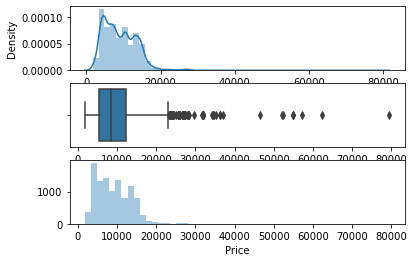

In [41]:
#plotting "Price" column to see the outliers
plot(data,'Price')

In [42]:
#taking a threshold price at 35000 and the updating the price greater than that threshold with median of the data (not mean of the data because mean gets affected by the outlier values)
data["Price"] = np.where(data["Price"] >= 35000, data["Price"].median(), data["Price"])

C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muche\OneDrive\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


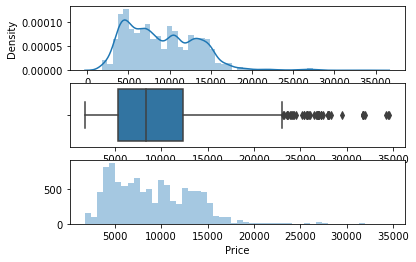

In [43]:
plot(data,'Price')

In [44]:
#dropping the fields "Source" and "Duration" as those are encoded already
data.drop(columns = ["Source","Duration"],axis = 1, inplace = True)
data.head(2)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hrs,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [45]:
data.dtypes

Airline                   int64
Destination               int64
Total_Stops               int64
Price                   float64
Day_of_Journey            int64
Month_of_Journey          int64
Dep_Time_Hours            int64
Dep_Time_Minutes          int64
Arrival_Time_Hours        int64
Arrival_Time_Minutes      int64
Duration_Hrs              int64
Duration_Min              int64
Source_Banglore           int64
Source_Kolkata            int64
Source_Delhi              int64
Source_Chennai            int64
Source_Mumbai             int64
dtype: object

In [46]:
from sklearn.feature_selection import mutual_info_regression

In [47]:
#selecting best features of the data
X = data.drop(["Price"], axis = 1)
y = data["Price"]

In [48]:
X.dtypes

Airline                 int64
Destination             int64
Total_Stops             int64
Day_of_Journey          int64
Month_of_Journey        int64
Dep_Time_Hours          int64
Dep_Time_Minutes        int64
Arrival_Time_Hours      int64
Arrival_Time_Minutes    int64
Duration_Hrs            int64
Duration_Min            int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [49]:
#getting scores form mutual info regression
score = mutual_info_regression(X,y)

In [50]:
#seeing the scores wrt the columns
feature_selection = pd.DataFrame(score,index = X.columns)
feature_selection.columns = ["Importance"]
feature_selection.sort_values("Importance",ascending = False)

,Importance
Destination,1.006982
Airline,0.978133
Total_Stops,0.788308
Source_Delhi,0.521167
Duration_Hrs,0.463843
Source_Kolkata,0.454722
Arrival_Time_Hours,0.404135
Source_Banglore,0.391473
Arrival_Time_Minutes,0.353960
Duration_Min,0.344116


In [51]:
#Data split for testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [52]:
#Training the model using Randomforestregressor
from sklearn.ensemble import RandomForestRegressor
ml_model = RandomForestRegressor()
model = ml_model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([16780.99,  6085.28,  8930.19, ...,  3498.01,  6205.24,  7009.84])

In [53]:
y_pred.shape

(2671,)

Training_score: 0.9512635905117758
r2_score: 0.8046734857897053
MSE:  3802538.382689968
MAE:  1187.6254542272486
RMSE:  1950.009841690541
MAPE:  13.255825356001779


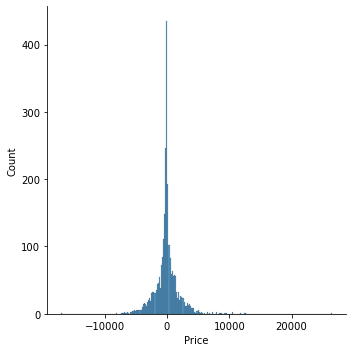

In [61]:
#performance metrics
print("Training_score: {}".format(model.score(X_train,y_train)))

def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
    
from sklearn import metrics
r2_score = metrics.r2_score(y_test,y_pred)
print("r2_score: {}".format(r2_score))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAPE: ",mape(y_test,y_pred))
sns.displot(y_test-y_pred)